In [50]:
import pandas as pd
import statsmodels.api as sm
#Q3
#Import data
df=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw5\flu_shot.txt',delim_whitespace = True)
print(df.head(3))
df.dtypes

   Y  X1  X2  X3
0  0  59  52   0
1  0  61  55   1
2  1  82  51   0


Y     int64
X1    int64
X2    int64
X3    int64
dtype: object

In [51]:
#a
df['intercept']=1
logit = sm.Logit(df['Y'], df[['X1','X2','X3','intercept']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.330482
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  159
Model:                          Logit   Df Residuals:                      155
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.2212
Time:                        22:46:02   Log-Likelihood:                -52.547
converged:                       True   LL-Null:                       -67.470
Covariance Type:            nonrobust   LLR p-value:                 1.486e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0728      0.030      2.396      0.017       0.013       0.132
X2            -0.0990      0.033     -2.957      0.003      -0.165      -0.033
X3             0.4340      0.522      0.832      0.406      -0.589       1.457
intercept     -1.1772      2.982     -0.395      0.693      -7.023       4.668
==============================================================================
"""

In [52]:
# test_model = sm.GLM(df['Y'], df[['X1','X2','X3','intercept']], family=sm.families.Binomial()).fit()
# print(test_model.summary())
# test_model.predict([55,60,1,1])

In [53]:
#b
import math
par=result.params
print(math.exp(par[0]))
print(math.exp(par[1]))
print(math.exp(par[2]))

1.0755025255300643
0.9057549411897955
1.543380056736259


In [54]:
#c
exp=math.exp(par[3]+par[0]*55+par[1]*60+par[2])
exp/(1+exp)

0.06422196567439764

In [55]:
#d
from scipy.stats import norm
z=norm.ppf(1-0.1/4)
z

1.959963984540054

In [56]:
#f
# result2 = sm.Logit(df['Y'], df[['X1','X2','intercept',]]).fit()
# result2.summary()

In [57]:
# from scipy.stats import chi2
# G2=-2*(result2.llf-result.llf)
# 1-chi2.cdf(G2,1)

In [58]:
df['age2']=(df.X1)**2
df['index2']=(df.X2)**2
df['inter']=df.X1*df.X2
result3 = sm.Logit(df['Y'], df[['X1','X2','X3','intercept','age2','index2','inter']]).fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.323795
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  159
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.2369
Time:                        22:46:02   Log-Likelihood:                -51.483
converged:                       True   LL-Null:                       -67.470
Covariance Type:            nonrobust   LLR p-value:                 1.651e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.0332      0.488     -0.068      0.946      -0.989       0.923
X2            -0.7529      0.488     -1.544      0.123      -1.709       0.203
X3             0.6200      0.554      1.119      0.263      -0.466       1.706
intercept     19.6040     24.191      0.810      0.418     -27.809      67.017
age2          -0.0005      0.003     -0.177      0.860      -0.007       0.006
index2         0.0040      0.003      1.394      0.163      -0.002       0.010
inter          0.0033      0.004      0.882      0.378      -0.004       0.011
==============================================================================
"""

In [59]:
from scipy.stats import chi2
G=-2*(result.llf-result3.llf)
1-chi2.cdf(G,3)

0.5466044337083797

In [60]:
#g
z=norm.ppf(0.95)
par=result2.params
# l=math.exp(par[2]-z*2.915+65*(par[0]-z*0.03)+50*(par[1]-z*0.032))
# u=math.exp(par[2]+z*2.915+65*(par[0]+z*0.03)+50*(par[1]+z*0.032))
# print(l/(1+l),u/(1+u))
z

1.6448536269514722

In [61]:
#h
import numpy as np

cut=[0.05, 0.10, 0.15, 0.20]
y=result.predict()
judge = np.zeros((len(y),4))
for j in range(len(cut)):
    for i in range(len(y)):
        if y[i]<=cut[j]:
                 judge[i,j]=0
        else:
                 judge[i,j]=1
# print(judge)
                
#total error rate
true=df.Y
error_rate=[]
for j in range(len(cut)):
    error=0
    for i in range(len(y)):
        if judge[i,j]!=true[i]:
            error=error+1
    error_rate.append(error/len(y))
print(error_rate)

#error rate for clients receiving the shot
error_rate_1=[]
for j in range(len(cut)):
    error=0
    for i in range(len(y)):
        if int(y[i])==1:
            if judge[i,j]!=true[i]:
                error=error+1
    error_rate_1.append(error/sum(true))
print(error_rate_1)

#error rate for clients not receiving the shot
error_rate_0=[]
for j in range(len(cut)):
    error=0
    for i in range(len(y)):
        if int(y[i])==0:
            if judge[i,j]!=true[i]:
                error=error+1
    error_rate_0.append(error/(len(y)-sum(true)))
print(error_rate_0)

[0.5408805031446541, 0.36477987421383645, 0.2641509433962264, 0.20125786163522014]
[0.0, 0.0, 0.0, 0.0]
[0.6370370370370371, 0.42962962962962964, 0.3111111111111111, 0.23703703703703705]


In [62]:
#i
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(true, y)
roc_auc=auc(fpr,tpr) 

<Figure size 432x288 with 0 Axes>

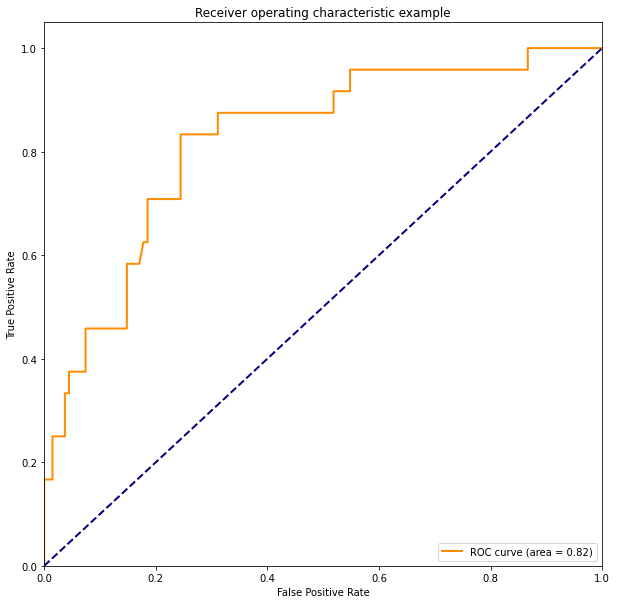

In [63]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:
#Q4
import pyreadr
data = pyreadr.read_r(r'C:\Users\Chenyi\Desktop\LR\HW5\dvisits.rda')
df=pd.concat(data, ignore_index = True) 
y=df.doctorco
x=df[['sex', 'age','income', 'levyplus', 'freepoor', 'freerepa', 'illness', 'actdays','hscore']]
x['intercept']=1
#a
model = sm.GLM(y,x,family=sm.families.Poisson()).fit()
model.summary()



<ipython-input-64-781385845003>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept']=1


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               doctorco   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5180
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3357.9
Date:                Mon, 12 Dec 2022   Deviance:                       4384.2
Time:                        22:46:02   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            0.1608      0.056      2.875      0.004       0.051       0.270
age            0.3411      0.162      2.100      0.036       0.023       0.660
income        -0.1886      0.085     -2.208      0.027      -0.356      -0.021
levyplus       0.1392      0.071      1.952      0.051      -0.001       0.279
freepoor      -0.4282      0.180     -2.383      0.017      -0.780      -0.076
freerepa       0.1021      0.092      1.114      0.265      -0.078       0.282
illness        0.1959      0.018     11.127      0.000       0.161       0.230
actdays        0.1280      0.005     26.082      0.000       0.118       0.138
hscore         0.0322      0.010      3.227      0.001       0.013       0.052
intercept     -2.0837      0.101    -20.619      0.000      -2.282      -1.886
==============================================================================
"""

In [65]:
#b
Ey=model.predict([1,0.5,10,0,1,0,2,0,1,1])
print(Ey)
# par=model.params
# math.exp(sum(par*[0,50,10000,0,1,0,2,0,1,1]))

[0.02619024]


In [66]:
#c
from scipy import stats
stats.poisson.pmf(0, Ey)

array([0.97414975])

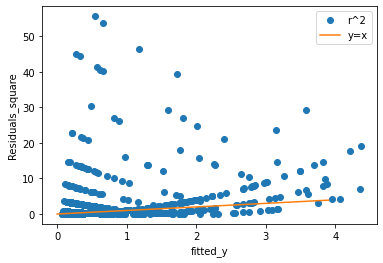

In [88]:
#d
# f, axes = plt.subplots(1, 2, figsize=(20, 6))
x = np.arange(0, 4, 0.1)
y = x
plt.plot(model.predict(), model.resid_response**2, 'o')
plt.plot(x,y)
plt.legend(['r^2','y=x'])
plt.ylabel("Residuals_square")
plt.xlabel("fitted_y")
# axes[1].plot(model.predict(), model.resid_pearson, 'o')
# axes[1].set_ylabel("Standardized residuals")
# axes[1].set_xlabel("fitted_y")
plt.show()

In [89]:
R = model.pearson_chi2 / model.df_resid
print(R)

1.3270307369895278
